# Group Assignment
## Members: Yang LI, Hemin HE, Yun LI, Yi LIANG, Xiaoyi HAO, Yuwen CHE

## Exercise 1

### Part 1

In [3]:
import numpy as np
from scipy import linalg

X = np.loadtxt('matrix_data.txt') #read file as matrix
def compute_sr(X):
    evalues, evectors = linalg.eig(X) #calculate the eigenvalues and eigenvectors
    spectral_radius = np.max(abs(evalues)) #spectral redius is the maxnium of eigenvalues
    print(f'the spectral radius of X is {spectral_radius:.4f}')

compute_sr(X)

the spectral radius of X is 1.0044


### Part 2

In [4]:
from scipy.linalg import norm

def check_LSR(i,X):
    v = abs(np.random.randn(10))
    v.shape = (10,1)
    X_power = X ** i
    X_v = X_power * v
    return linalg.norm(X_v)**(1/i)

In [8]:
X = np.matrix(X)

In [9]:
check_LSR(80000,X)

1.0044339563357938

## Exercise 2

In [92]:
import numba
import numpy as np
import matplotlib.pyplot as plt

### The original function, not jitted

In [93]:
def quad(x0,n):
    x = np.empty(n)
    x[0]=x0
    for t in range(n-1):
        x[t+1] = 4 * x[t] * (1 - x[t])
    return x

In [94]:
def quad_m_hist(n,m=100):
    bins = np.linspace(0,1,100)
    for i in range(m):
        x0 = np.random.uniform(0,1,1)
        x = quad(x0,n)
        x0_f = x[0]
        title = r'$graph \quad {0:.0f}: \quad initial \quad value = {1:.2f}$'.format(i+1,x0_f)
        plt.hist(x,bins = bins,facecolor='green',alpha=0.75)
        plt.grid(True)
        plt.xlabel('value of x')
        plt.ylabel('Counts')
        plt.title(title)
        plt.show()
    print('The plotting is finished')

In [ ]:
quad_m_hist(10_000_000,m=100)  # Please try with caution. It takes forever to run. 

### The improved, jitted function

In [95]:
@numba.jit()

def quad_jitted(x0,n):
    x = np.empty(n)
    x[0]=x0
    for t in range(n-1):
        x[t+1] = 4 * x[t] * (1 - x[t])
    return x

In [96]:
def quad_m_hist_jitted(n,m=100):
    bins = np.linspace(0,1,100)
    for i in range(m):
        x0 = np.random.uniform(0,1,1)
        x = quad_jitted(x0,n)
        x0_f = x[0]
        title = r'$graph \quad {0:.0f}: \quad initial \quad value = {1:.2f}$'.format(i+1,x0_f)
        plt.hist(x,bins = bins,facecolor='green',alpha=0.75)
        plt.grid(True)
        plt.xlabel('value of x')
        plt.ylabel('Counts')
        plt.title(title)
        plt.show()
    print('The plotting is finished')

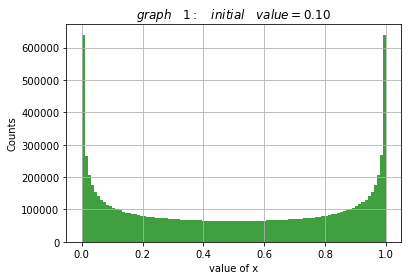

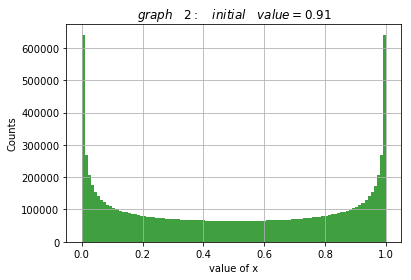

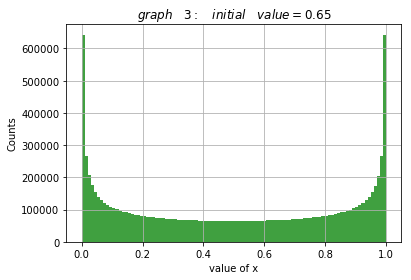

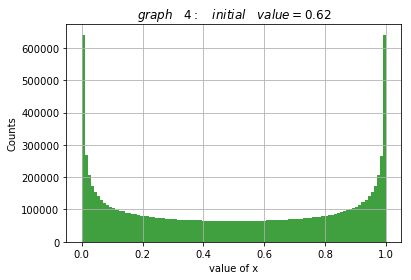

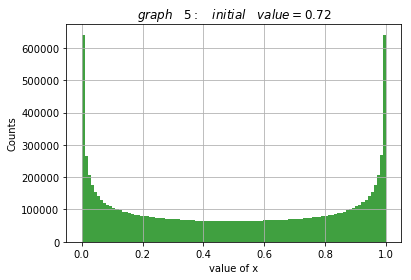

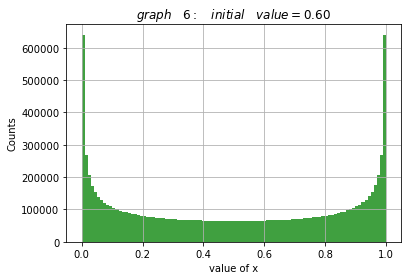

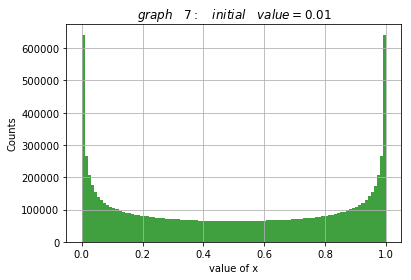

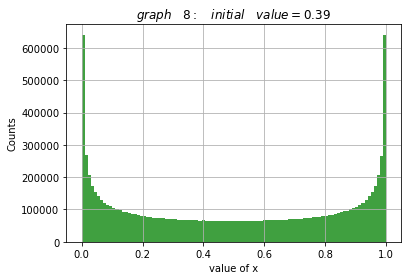

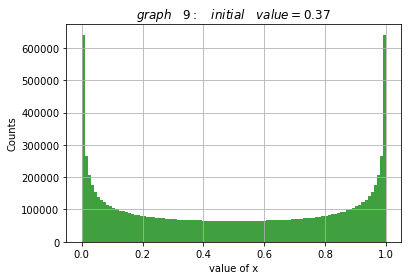

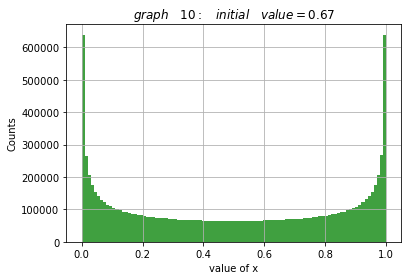

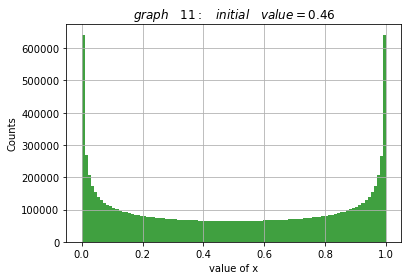

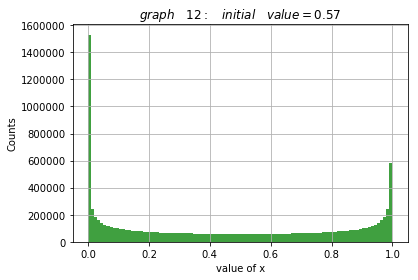

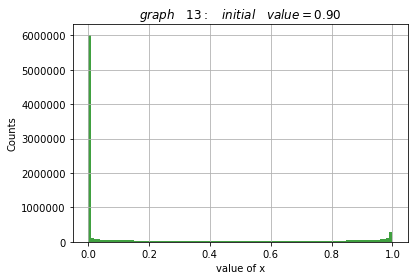

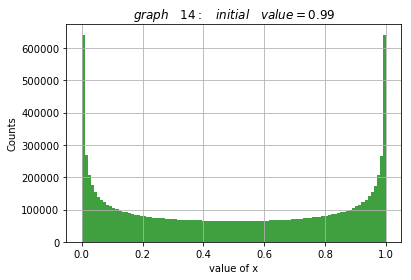

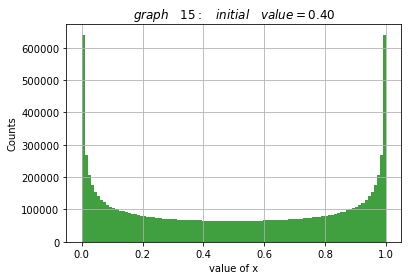

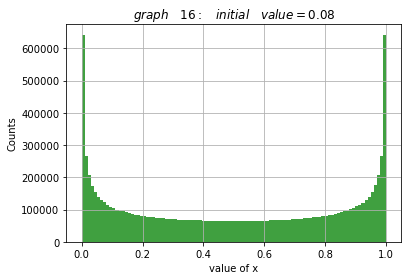

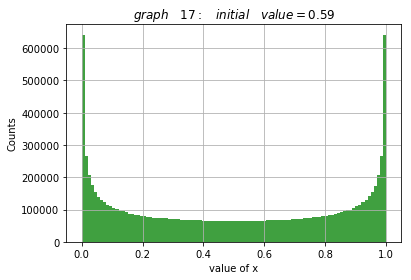

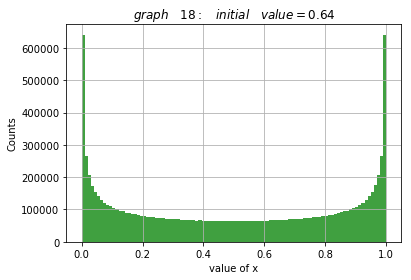

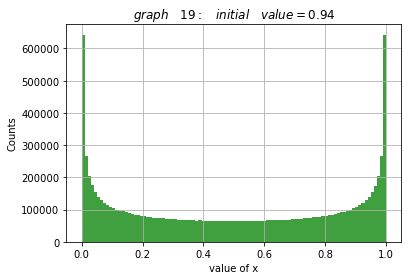

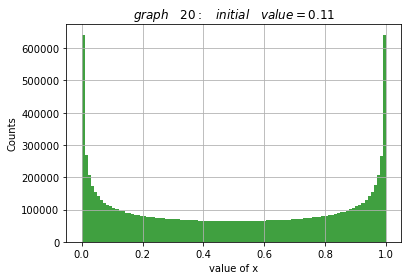

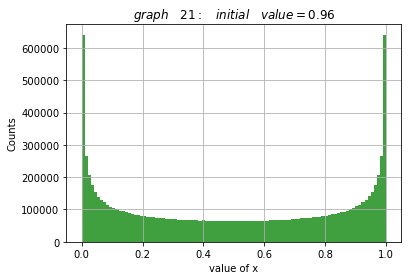

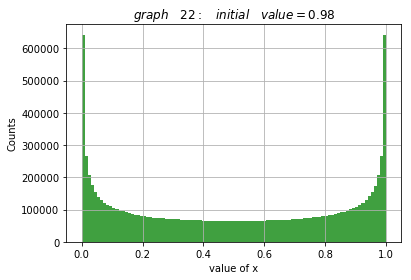

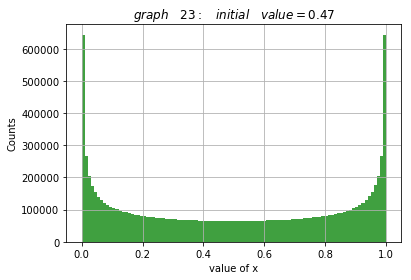

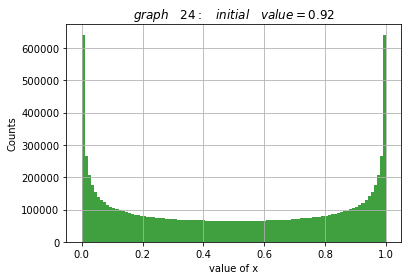

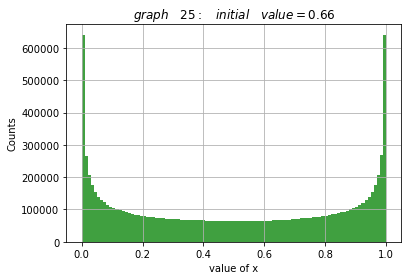

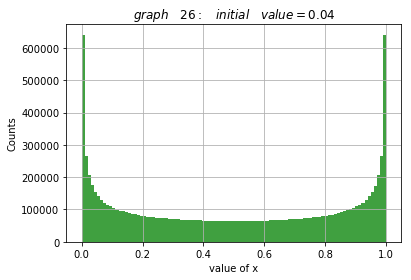

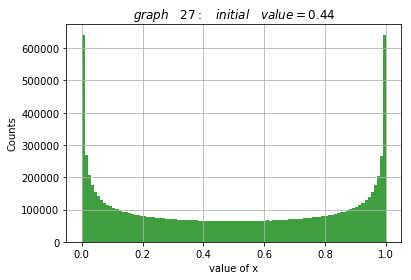

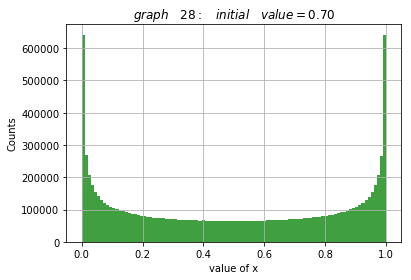

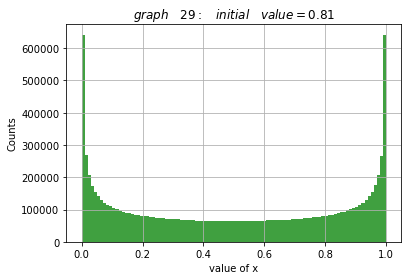

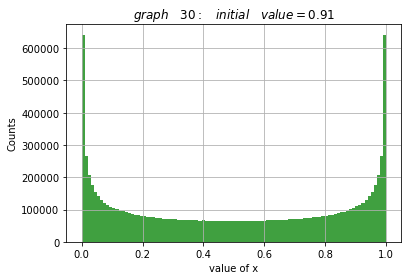

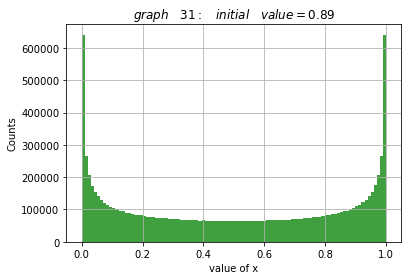

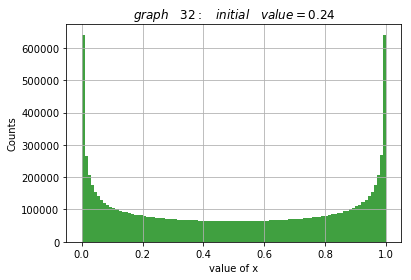

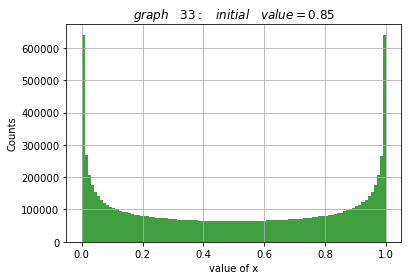

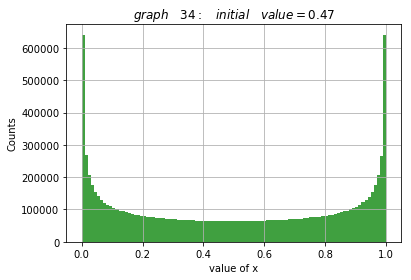

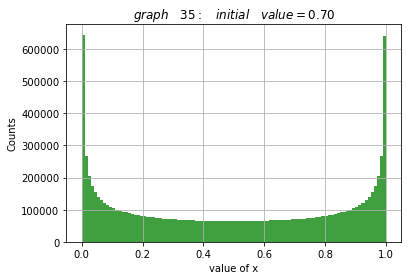

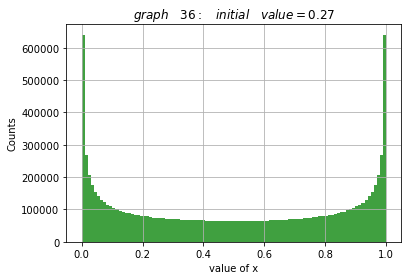

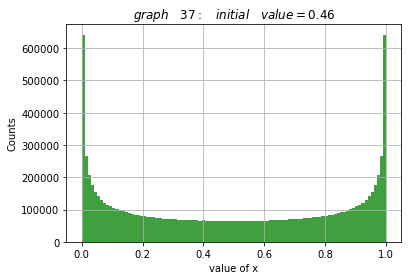

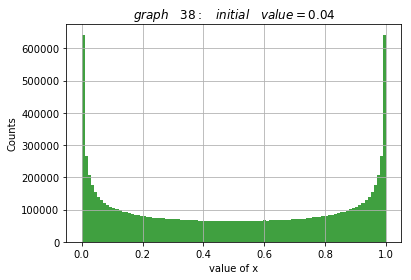

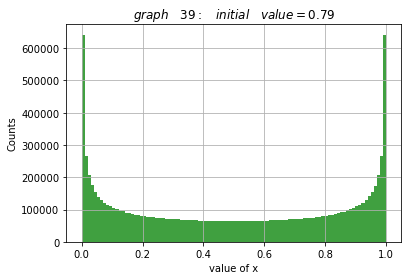

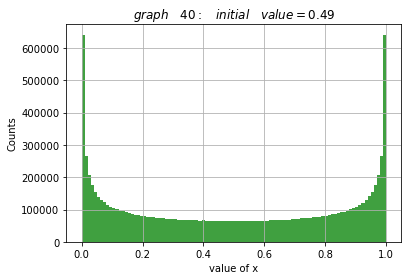

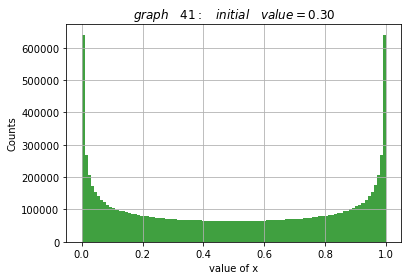

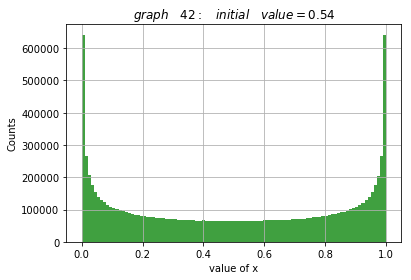

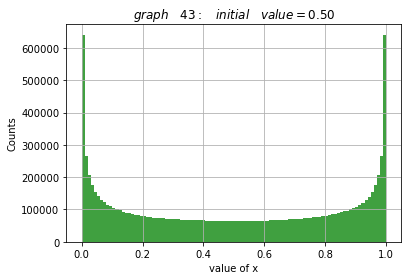

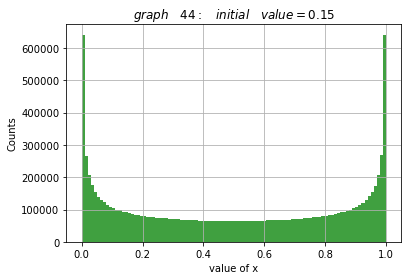

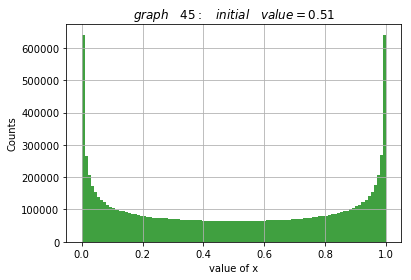

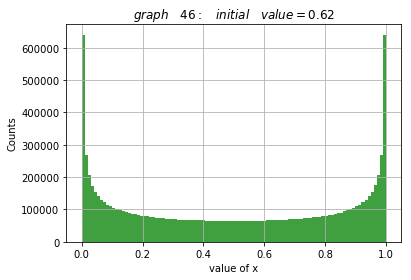

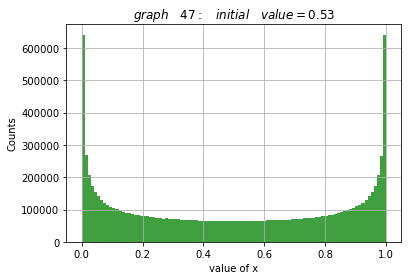

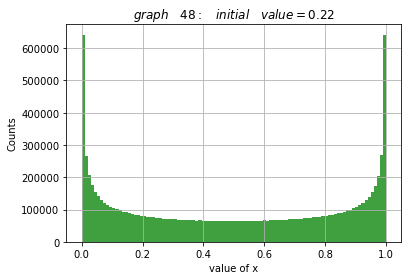

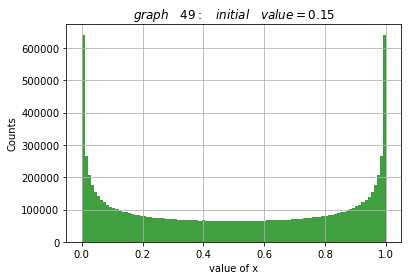

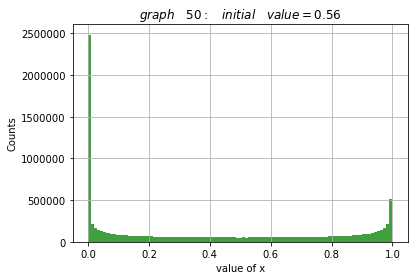

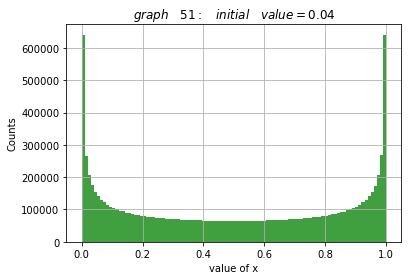

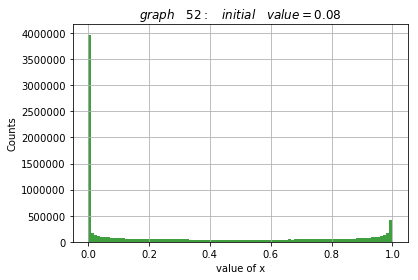

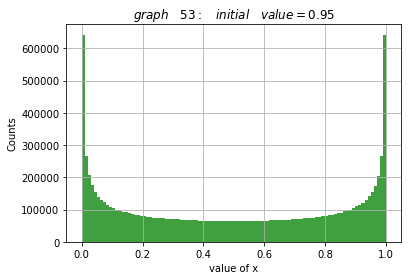

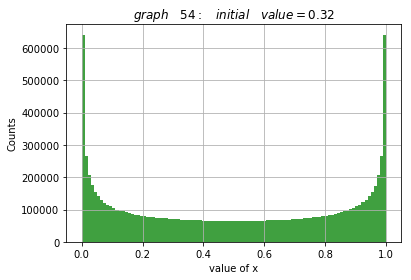

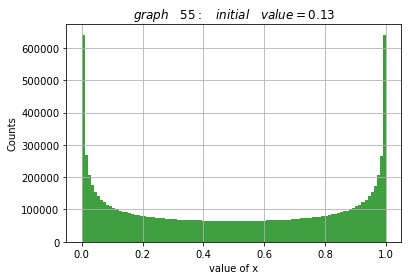

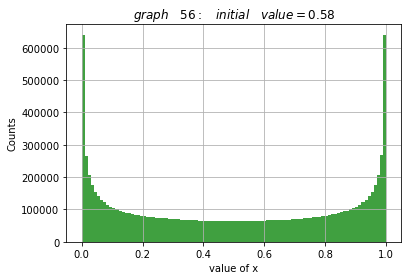

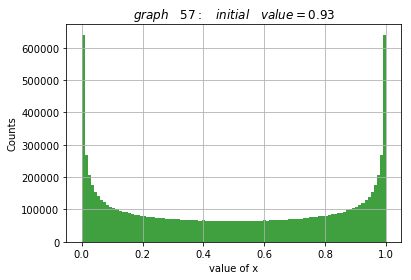

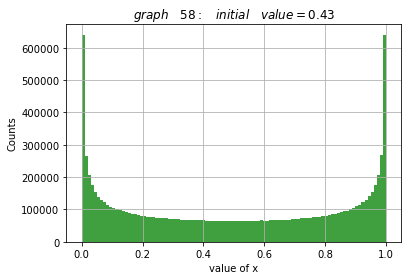

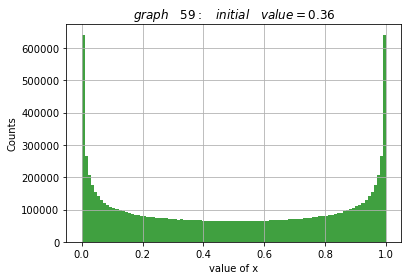

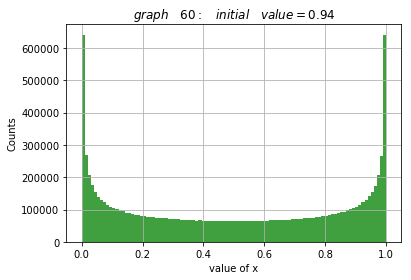

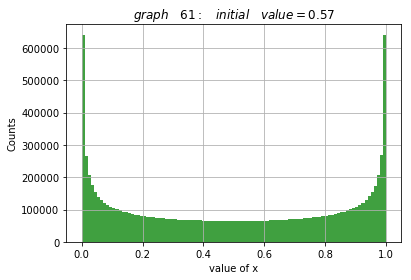

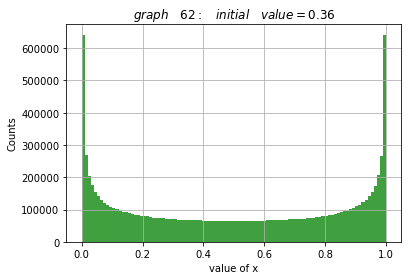

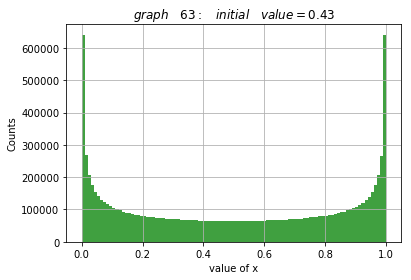

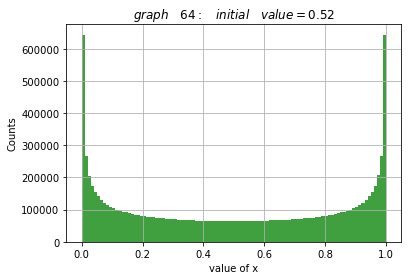

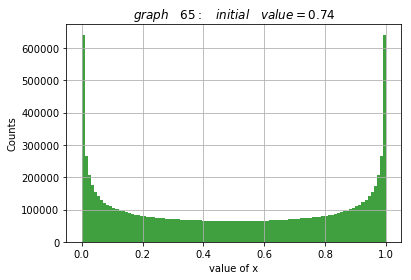

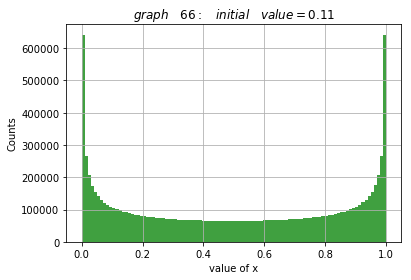

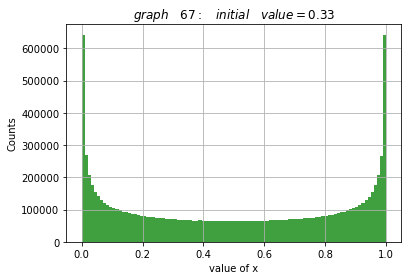

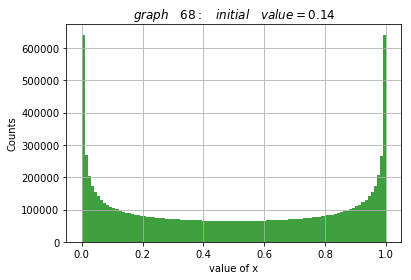

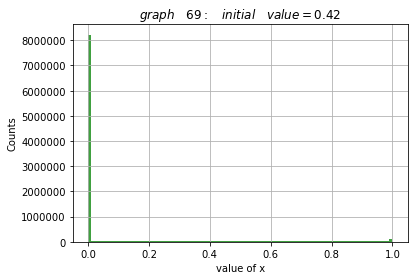

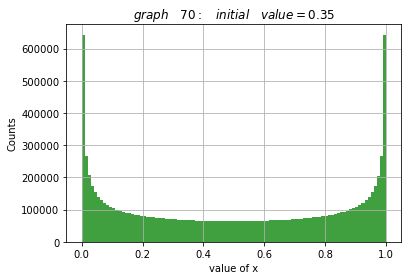

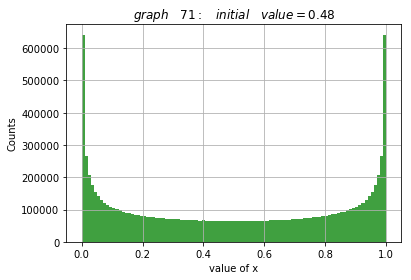

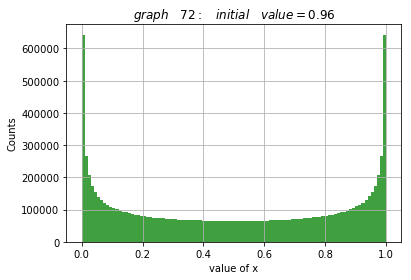

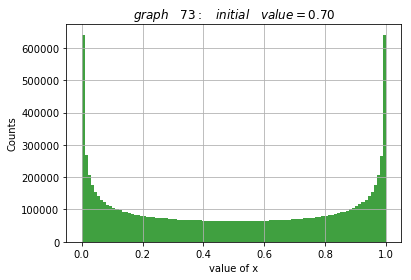

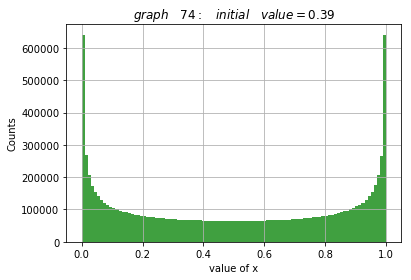

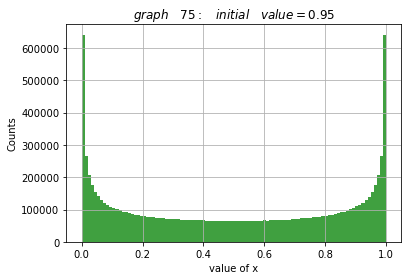

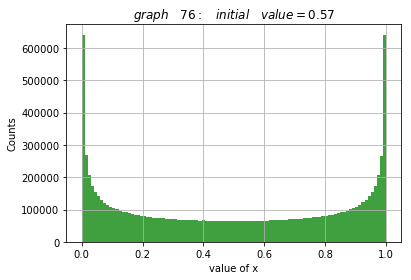

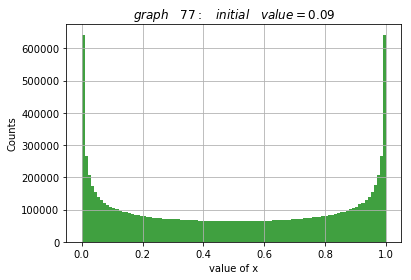

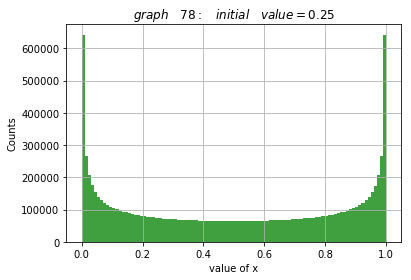

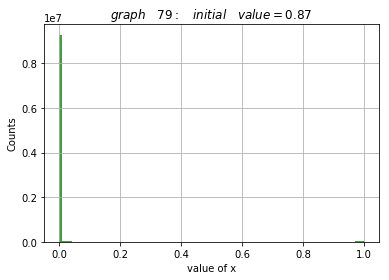

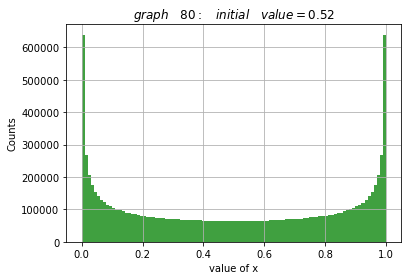

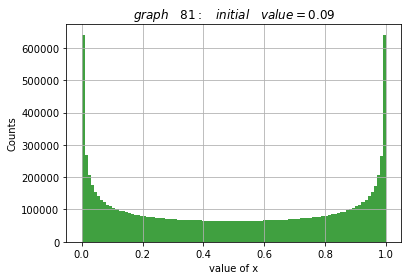

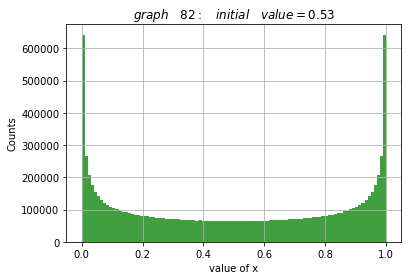

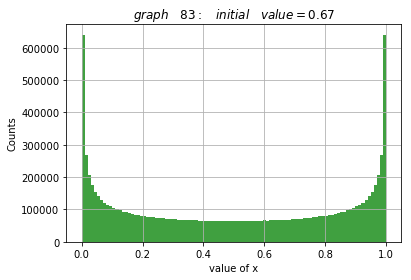

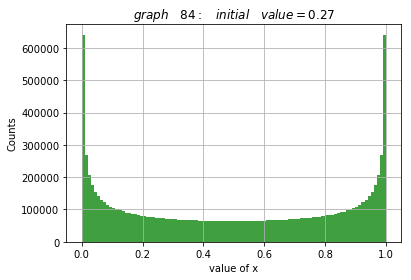

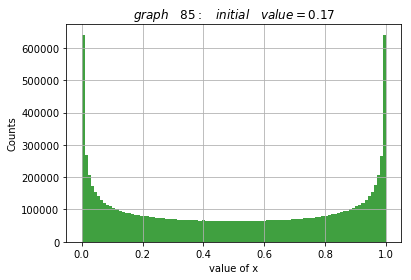

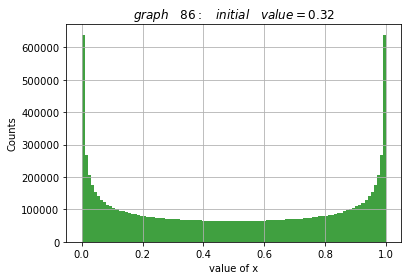

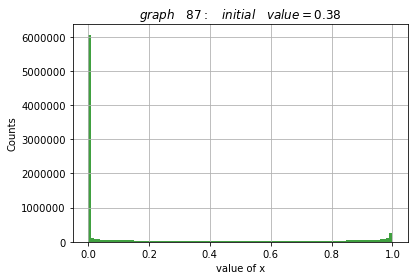

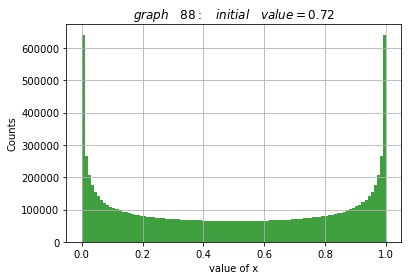

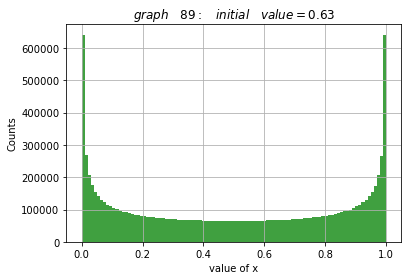

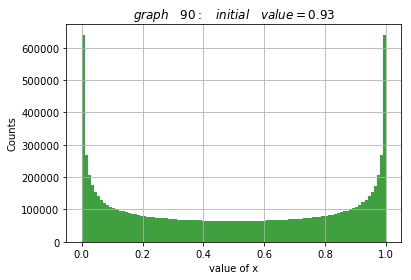

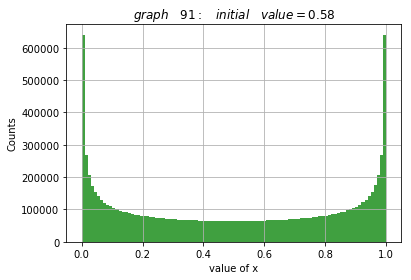

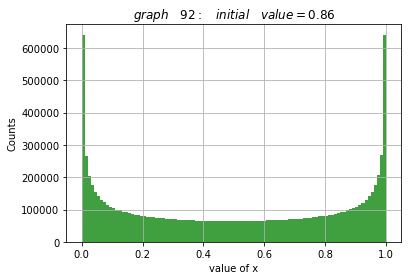

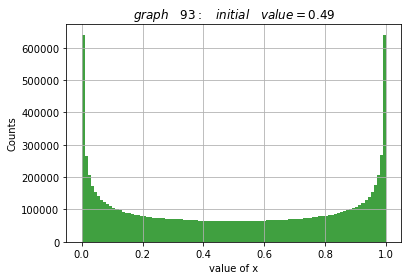

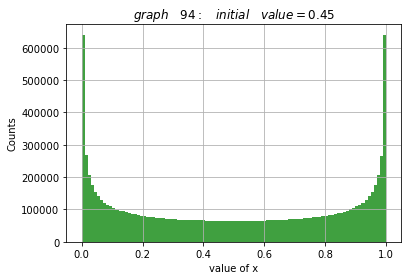

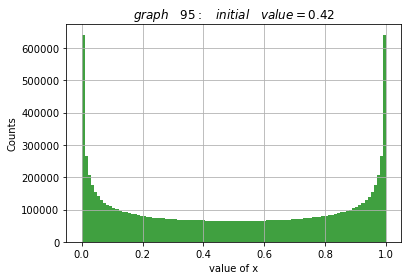

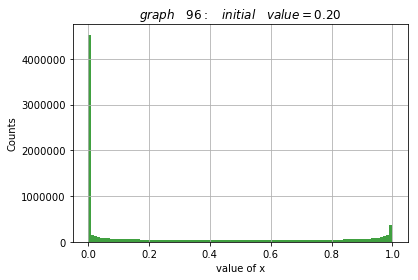

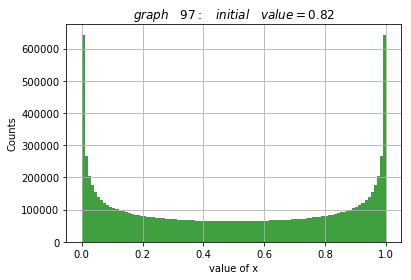

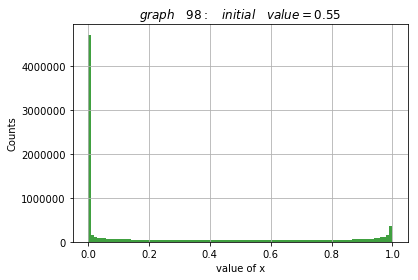

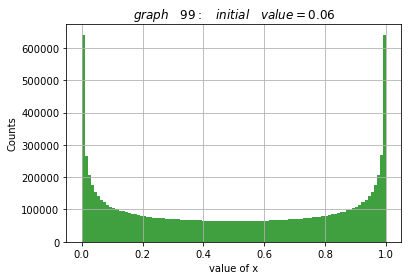

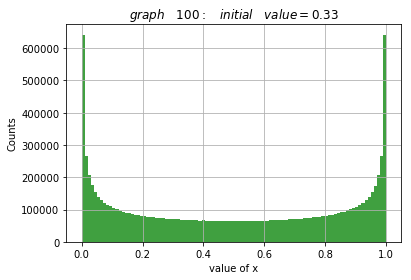

The plotting is finished


In [97]:
quad_m_hist_jitted(10_000_000,m=100)

### Our observation: all the histograms look alike, which implies that the initial value does not affect the distribution of $x$'s.

### Now test the speed of the two sets of functions

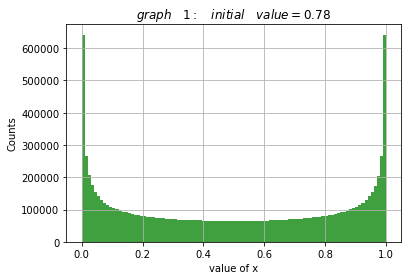

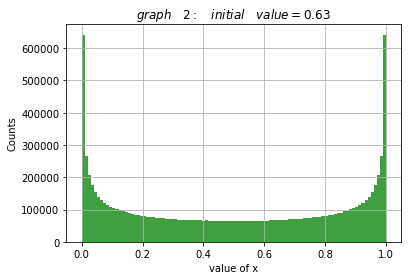

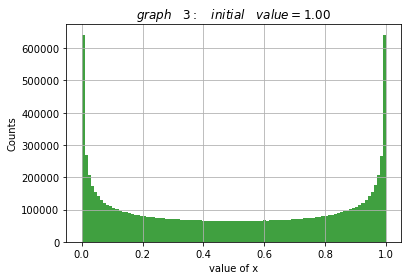

The plotting is finished


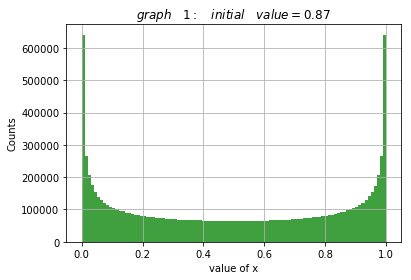

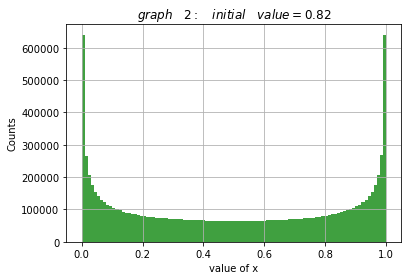

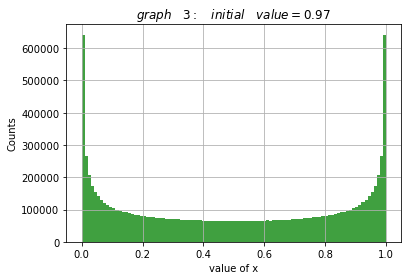

The plotting is finished


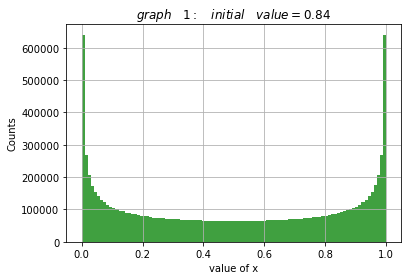

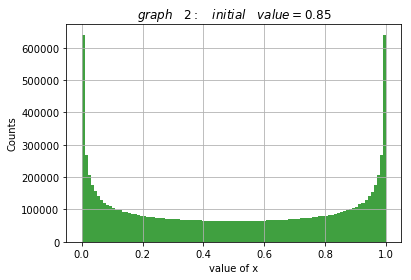

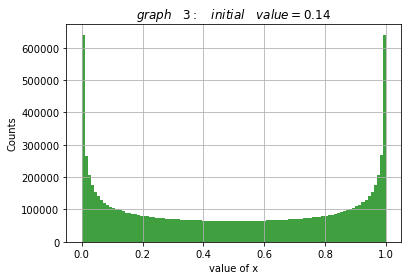

The plotting is finished


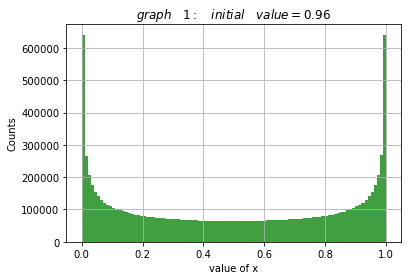

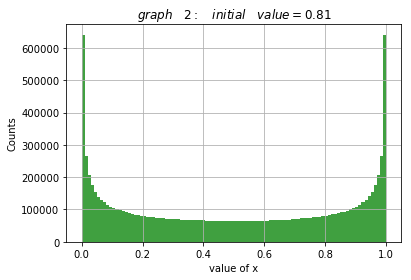

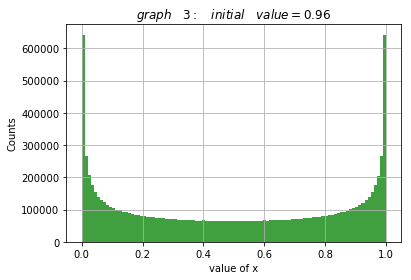

The plotting is finished
1 loop, best of 3: 2.95 s per loop


In [98]:
%%timeit                      # Jitted
quad_m_hist_jitted(n=10_000_000,m=3) # 3 is the number of testing rounds, since 100 is too big a number for the unjitted version. 

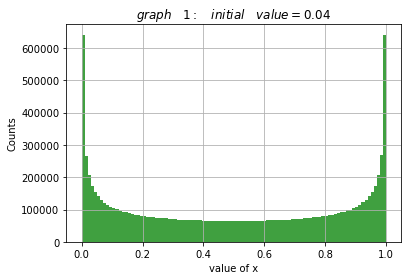

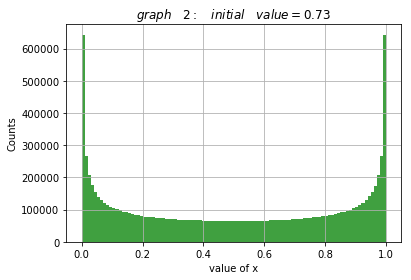

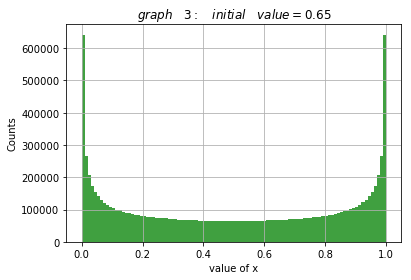

The plotting is finished


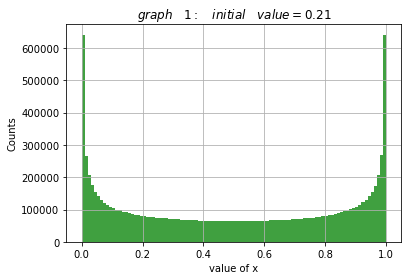

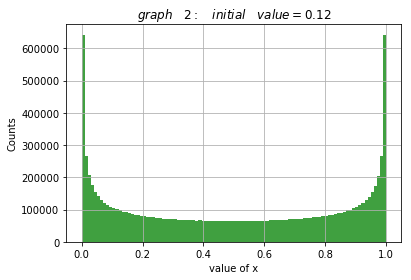

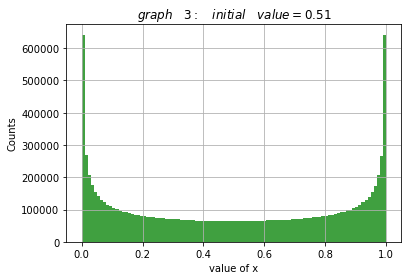

The plotting is finished


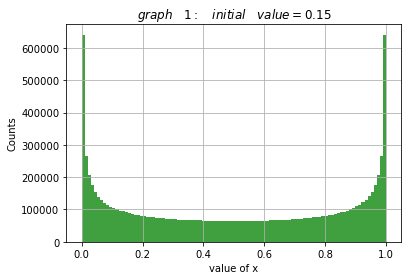

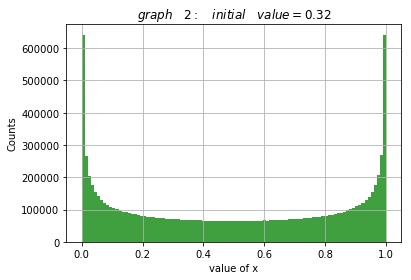

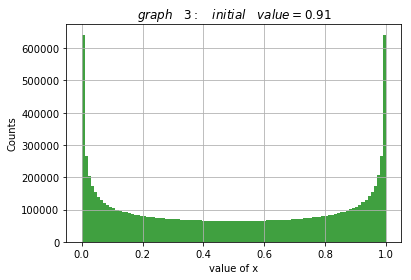

The plotting is finished


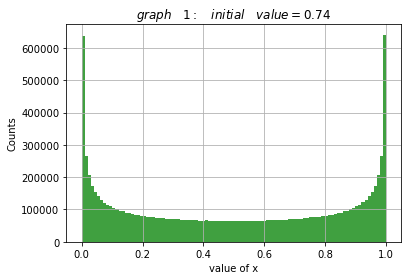

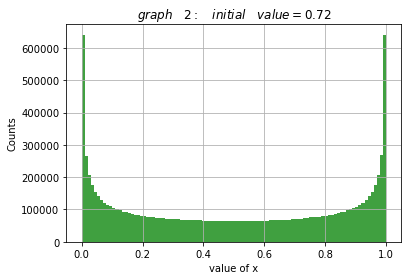

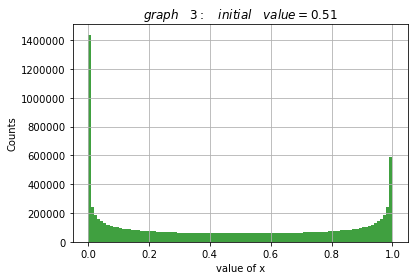

The plotting is finished
1 loop, best of 3: 25.1 s per loop


In [99]:
%%timeit                      # Not jitted
quad_m_hist(n=10_000_000,m=3) 